This will try and remove some redundant specs on the images by applying a mask.

# Imports

In [1]:
import numpy as np
import scipy.io 
import pandas as  pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

# DB

In [3]:
workingDir = 'C:/Cerebral/_MarioSandBox/DB/medicalHolography/vascular/Example/'
dataName = 'VTD_ready_for_ROI_choice.mat'
maskName = 'mask.mat'

In [4]:
def readData(fileLocationAndName,VariableName):
    data = scipy.io.loadmat(fileLocationAndName)
    data = data[VariableName]
    dataArray = np.array(data)
    return dataArray

In [5]:
data = readData(workingDir+dataName,'VTD_ready')
data.shape

(360L, 766L, 760L)

In [6]:
mask = readData(workingDir+maskName,'mask')
mask.shape

(760L, 766L)

# Data Manipulation

In [7]:
def invertImages(stack):
    [slices,w,l] = np.shape(stack)
    invertedImages = np.zeros([slices,l,w])
    numSlices = np.shape(stack)[0]
    for sliceIndex in xrange(numSlices):        
        currentImage = np.fliplr(np.flipud(stack[sliceIndex].T))
        invertedImages[sliceIndex]= currentImage        
    return invertedImages    

# Visualization Functions

In [8]:
def drawSingleImage(stack):
    plt.figure()
    plt.imshow(stack)

In [9]:
def drawSlice(stack,sliceIndex):
    plt.figure()
    plt.imshow(stack[sliceIndex])

In [10]:
def sample_stack(stack, rows=6, cols=6, start_with=10, show_every=3):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='jet')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

# Mask Functions

In [11]:
def maskImageStack(stack,mask):    
    maskedImages = np.zeros(np.shape(stack))
    numSlices = np.shape(stack)[0]
    for sliceIndex in xrange(numSlices):
        currentImage = stack[sliceIndex]
        maskedImages[sliceIndex]= np.multiply(currentImage,mask)
    
    return maskedImages    

# Data visualization Functions
- [3D Plotting](https://www.raddq.com/dicom-processing-segmentation-visualization-in-python/)

In [12]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *

import  plotly.plotly  as py
import plotly.graph_objs as go

In [13]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans

In [14]:
def make_mesh(image, threshold=-300, step_size=1):
    print "Transposing surface"
    p = image.transpose(2,1,0)
    
    print "Calculating surface"
    verts, faces = measure.marching_cubes(p, threshold) 
    return verts, faces

def plotly_3d(verts, faces):
    x,y,z = zip(*verts) 
    
    print "Drawing"
    
    # Make the colormap single color since the axes are positional not intensity. 
#    colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
    colormap=['rgb(236, 236, 212)','rgb(236, 236, 212)']
    
    fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=faces,
                        backgroundcolor='rgb(64, 64, 64)',
                        title="Interactive Visualization")
    iplot(fig)

def plt_3d(verts, faces):
    print "Drawing"
    x,y,z = zip(*verts) 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    print 'generating poly3d'
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], linewidths=0.05, alpha=1)
    print 'finished generating poly3d'
    face_color = [1, 1, 0.9]
    print 'adding some colour'
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    print 'setting limits'
    ax.set_xlim(0, max(x))
    ax.set_ylim(0, max(y))
    ax.set_zlim(0, max(z))
    print 'adding some colour'
    ax.set_axis_bgcolor((0.7, 0.7, 0.7))
    print 'showing'
    plt.show()
    print 'finished'

In [15]:
def myplotly_3d(verts, faces):
    x,y,z = zip(*verts) 
    
    print "Drawing"
    
    # Make the colormap single color since the axes are positional not intensity. 
#    colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
    colormap=['rgb(236, 236, 212)','rgb(236, 236, 212)']
    
    fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap="Portland",
                        simplices=faces,
                        backgroundcolor='rgb(64, 64, 64)',
                        title="Interactive Visualization")
    iplot(fig)


# Main Work

Before doing some mesh generation we need to massage the data such that it looks like the ones we see in the example folder that was given to us.

In [16]:
newData = invertImages(data)

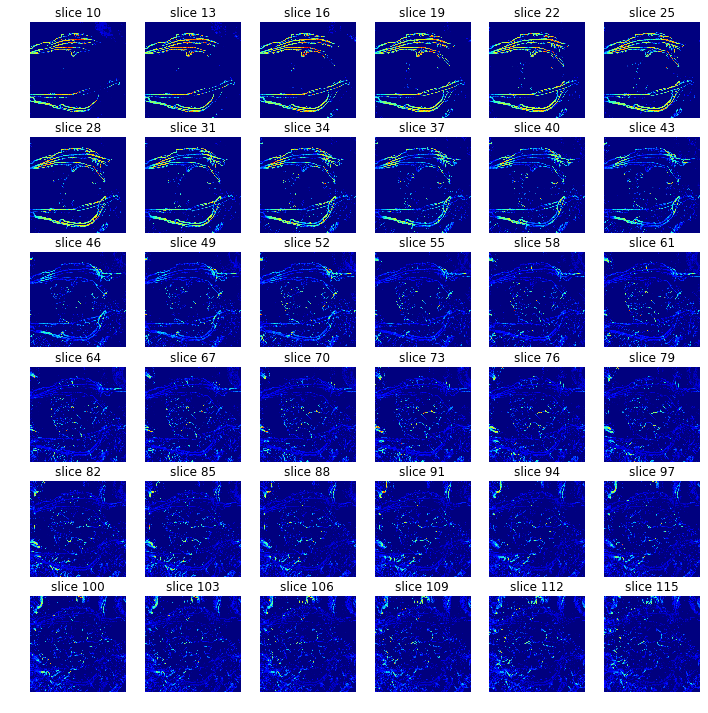

In [17]:
sample_stack(data)

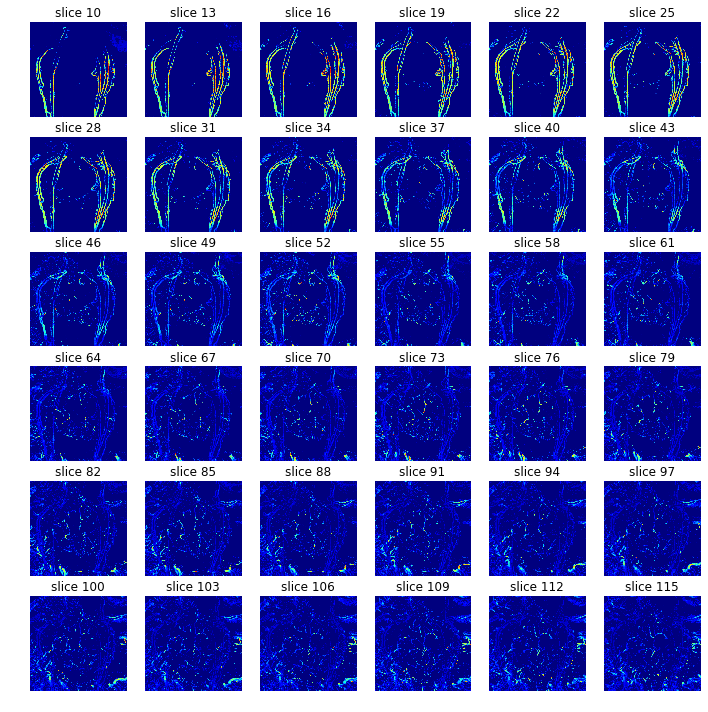

In [18]:
sample_stack(newData)

Now let us apply the mask to this new data and then view it again.

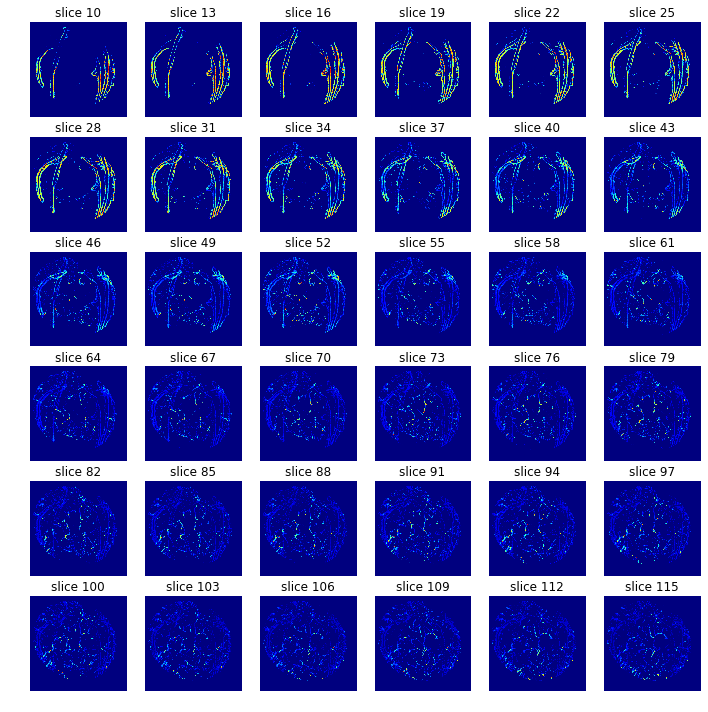

In [19]:
maskedData = maskImageStack(newData,mask)
sample_stack(maskedData)

Let us visualize this data in a movie format to see which frames are of interest.

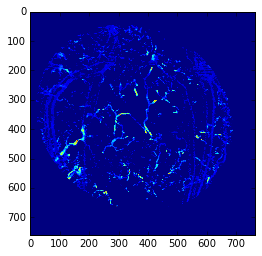

In [21]:
drawSingleImage(maskedData[97])

In [ ]:
fig = plt.figure()

for k in range(180):
    plt.clf()
    plt.imshow(maskedData[k,:,:],cmap=plt.cm.jet)        
    plt.title('slice : %d'%(k+3))
    fig.canvas.draw()    

Based on the above images it seems we can extract everything from 0-180 and the rest should be excluded

In [ ]:
someMaskedData = maskedData[0:180,:,:]
np.shape(someMaskedData)

In [ ]:
v, f = make_mesh(someData,0.0)

# STL Generation

- [STL Toolbox](https://pypi.org/project/numpy-stl/)

In [ ]:
from stl import mesh

In [ ]:
veins = mesh.Mesh(np.zeros(f.shape[0], dtype=mesh.Mesh.dtype))

In [ ]:
for i, f in enumerate(f):
    for j in range(3):
        veins.vectors[i][j] = v[f[j],:]

In [ ]:
veins.save('veins.stl')